# Ridge faba removed chewiness

   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  4  4  4  4]
11


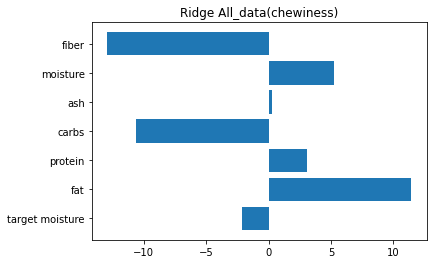

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('30_12_12_faba_comm_removed.csv',header=0)
features_all=data.iloc[:,1:8]

response = 'chewiness'
if response=='crosswise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,6:7])
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,7:8])    
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,9:10])
    print(features_all.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,8:9])
    print(features_all.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

reg = Ridge().fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)          
plt.barh(features_all.columns, reg.coef_)
plt.title('Ridge All_data'+ '('+response+')')
plt.show()





C:\Users\Sezin\anaconda3\envs\lab39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


ValueError: 'c' argument has 45 elements, which is inconsistent with 'x' and 'y' with size 0.

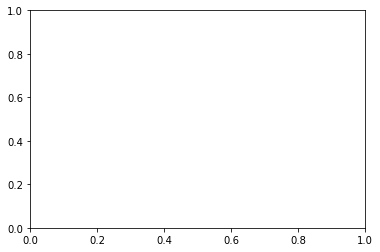

In [2]:
import numpy as np
import statsmodels.api as sm
import pylab as py
from matplotlib.colors import ListedColormap
  
# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
     
colors = ListedColormap(['#F8766D','#00BA38','#619CFF'])


plt.scatter(y=residuals,x=predictions,c=labels,cmap=colors,s=20)
plt.xlabel('Predicted Value')
plt.ylabel('residuals')
# plt.scatter(y=residual,x=count, color = 'blue')
# plt.xlabel('sample')
# plt.ylabel('residuals')
plt.show()
sm.qqplot(np.array(residuals), line ='s')
py.show()

In [5]:
data.describe()

,Study_ID,target_moisture,fat,protein,carbs,ash,moisture,fiber,Hardness,Chewiness,Group_ID
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.666667,60.453397,3.805877,70.016277,13.431210,4.375741,5.790156,2.384444,44.910848,35.883910,4.925926
std,0.824163,6.545867,3.084216,9.902260,5.372885,0.839619,1.964833,3.492269,22.538406,17.056761,3.679888
min,1.000000,43.670819,0.200000,56.000000,2.900000,3.374500,2.000000,0.020000,14.631400,12.338200,1.000000
25%,1.000000,56.487500,0.200000,63.178800,9.200000,3.954500,4.859778,0.510000,23.791950,19.989550,1.000000
50%,1.000000,59.000000,3.000000,68.071111,14.544444,4.000000,6.000000,1.300000,44.188200,35.879316,4.000000
75%,2.000000,67.000000,6.662000,79.000000,18.601000,5.000000,6.433700,1.600000,60.093600,47.283099,8.000000
max,3.000000,70.000000,7.757778,88.000000,21.377778,6.000000,9.000000,10.000000,98.401000,79.281500,12.000000


Text(0.5, 1.0, 'Correlation after Faba-Bean-Commercial Removed')

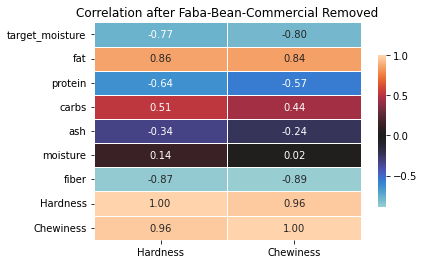

In [30]:
import seaborn as sns
sns.heatmap(data.corr().loc[:,['Hardness','Chewiness']].drop(['Study_ID','Group_ID']),vmax=1.0, center=0, fmt='.2f',
                square=False, linewidths=.8, annot=True, cbar_kws={"shrink": .70})
plt.title('Correlation after Faba-Bean-Commercial Removed')

Text(0.5, 1.0, 'Correlation')

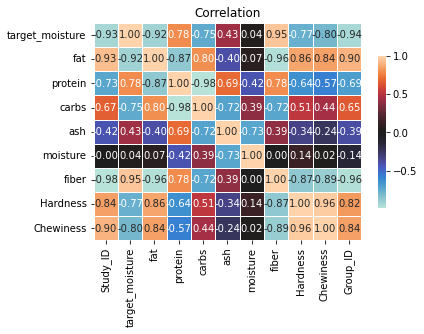

In [31]:
import seaborn as sns
sns.heatmap(data.corr().drop(['Study_ID','Group_ID']),vmax=1.0, center=0, fmt='.2f',
                square=False, linewidths=.8, annot=True, cbar_kws={"shrink": .70})
plt.title('Correlation')

In [23]:
data.corr().loc[:,['Hardness','Chewiness']].drop(['Study_ID','Group_ID'])

,Hardness,Chewiness
target_moisture,-0.773201,-0.796752
fat,0.857652,0.844532
protein,-0.636930,-0.567186
carbs,0.512704,0.443966
ash,-0.335184,-0.241698
moisture,0.139172,0.023537
fiber,-0.872126,-0.892701
Hardness,1.000000,0.962787
Chewiness,0.962787,1.000000


# Ridge

   target_moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  4  4  4  4]
11


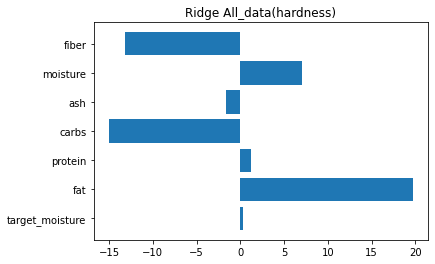

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('30_12_12_faba_comm_removed.csv',header=0)
features_all=data.iloc[:,1:8]

response = 'hardness'
if response=='crosswise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,6:7])
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,7:8])    
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,9:10])
    print(features_all.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,8:9])
    print(features_all.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

reg = Ridge().fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)          
plt.barh(features_all.columns, reg.coef_)
plt.title('Ridge All_data'+ '('+response+')')
plt.show()



